In [1]:
# load required packages
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Priyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#change path below to folder where you place the files
corpus_path = "C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_profiles" 

In [5]:
corpus = PlaintextCorpusReader(corpus_path, ".*\.txt")

In [6]:
print("Company Profile Corpus Statistics")
print("Number of profiles: " + str(len(corpus.fileids())))
print("Number of paragraphs: " + str(len(corpus.paras())))
print("Number of sentences: " + str(len(corpus.sents())))
print("Number of words: " + str(len(corpus.words())))

Company Profile Corpus Statistics
Number of profiles: 3558
Number of paragraphs: 3558
Number of sentences: 23988
Number of words: 790836


In [7]:
list_corpus = []
#Converting corpus to list of lists
for i in range(0,len(corpus.fileids())):
    list_corpus.append(list(corpus.words(corpus.fileids()[i])))

In [6]:
common_words = ['product','products','service','services','solution','solutions','segment','segments','offering','offerings',\
                'market','markets','provide','provides','provided','industry','industries','sells','sell','sold','state',\
                'states','headquarter','headquarters','headquartered', 'canada', 'california','texas','america','management',\
               'manages','manage', 'management','business','businesses','operation','operations','state','states',\
                'subsidiary','subsidiaries','approximate','approximately','group','groups','include','including','includes',\
                'base','bases','location','locations','use','uses','store','stores','unit','units','item','items',\
                'outlet','outlets','offer','process','processes','processing','corporation','corporate','custom'\
               ]      
               
#common_words.sort()             
#len(common_words)            
               

In [116]:
# Preprocessing
#commenting everything as I had already saved new_corpus after the first time. 
# creating a list called common_words to remove from corpus

import time
start = time.time()

new_corpus = []    
for i in range(0,len(list_corpus)):
    #remove punctuation
    review = re.sub('[^a-zA-Z]', ' ', str(list_corpus[i]))
    #convert all to lowercase
    review = review.lower()
    review = review.split()
    #stemming
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english')) if not word in set(common_words)]
    review = ' '.join(review)
    new_corpus.append(review)

end = time.time()
print("execution time:",round(((end-start)/60),2),"minutes")


519.878160238266


In [117]:
# to store the new_corpus list instead of having to run it each time 
#%store new_corpus 


Stored 'new_corpus' (list)


In [3]:
#restoring new_corpus which was stored already
%store -r 

In [8]:
#checking the content of a random document from new_corpus and comparing it to original description
import random
rand_num = random.randrange(1,3559,1)
print("Original description:")
print(' '.join(corpus.words(corpus.fileids()[rand_num])))
print()
print("After pre-processing:")
print(new_corpus[rand_num])
print()

Original description:
Philip Morris International Inc ., through its subsidiaries , manufactures and sells cigarettes , other tobacco products , and other nicotine - containing products . Its portfolio of brands comprises Marlboro , Parliament , Bond Street , Chesterfield , L & M , Lark , Philip Morris , Merit , Virginia S ., Muratti , and Next . The company also owns various cigarette brands , such as Dji Sam Soe , Sampoerna A , and Sampoerna U in Indonesia ; Fortune and Jackpot in the Philippines ; Belmont and Canadian Classics in Canada ; and Delicados in Mexico . It markets and sells its products in the European Union , Eastern Europe , the Middle East , Africa , Asia , Latin America , and Canada . Philip Morris International Inc . was incorporated in 1987 and is headquartered in New York , New York .

After pre-processing:
philip morri intern inc manufactur cigarett tobacco nicotin contain portfolio brand compris marlboro parliament bond street chesterfield l lark philip morri mer

In [9]:
import pandas as pd
df = pd.read_csv('company_info.csv')

TD-IDF 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
#original: max_df=0.8, min_df=0.05, max_features=200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.02, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=None, ngram_range=(1,3))
#fit the vectorizer to corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(new_corpus) 

In [11]:
# to see shape of tfidf matrix
tfidf_matrix.shape

(3558, 831)

In [12]:
#tdidf feature names
terms = tfidf_vectorizer.get_feature_names()

In [13]:
terms

['accept',
 'access',
 'accessori',
 'account',
 'account certif',
 'account certif deposit',
 'account money',
 'account save',
 'account save account',
 'acquir',
 'acquisit',
 'acr',
 'activ',
 'acut',
 'ad',
 'addit',
 'addit compani',
 'addit compani offer',
 'addit offer',
 'address',
 'administr',
 'adult',
 'advanc',
 'advertis',
 'advisori',
 'aerospac',
 'africa',
 'agenc',
 'agent',
 'agreement',
 'agricultur',
 'air',
 'aircraft',
 'allow',
 'altern',
 'america',
 'american',
 'analysi',
 'analyt',
 'annuiti',
 'anti',
 'apparel',
 'applianc',
 'applic',
 'applic compani',
 'april',
 'area',
 'arizona',
 'asia',
 'asia pacif',
 'assembl',
 'assess',
 'asset',
 'assist',
 'associ',
 'atm',
 'australia',
 'auto',
 'autom',
 'autom teller',
 'automat',
 'automobil',
 'automot',
 'aviat',
 'balanc',
 'bancorp',
 'bancorp oper',
 'bank',
 'bank hold',
 'bank hold compani',
 'bank variou',
 'bar',
 'barrel',
 'base',
 'basin',
 'bear',
 'benefit',
 'beverag',
 'biolog',
 'biophar

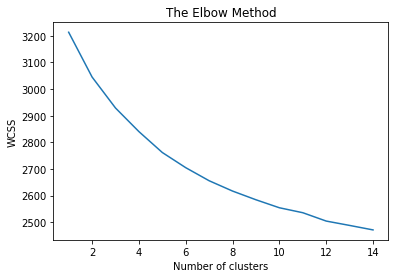

In [263]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Kmeans Clustering
from sklearn.cluster import KMeans
num_clusters = 5
#km = KMeans(n_clusters=num_clusters, random_state = 42)
#km.fit(tfidf_matrix)
#clusters = km.labels_.tolist()

In [15]:
# saving the clustering model
from sklearn.externals import joblib

#uncomment the below to save your model 
#joblib.dump(km,  '5clusters.pkl')
#since I've already run my model I am loading from the pickle
#Uncomment to load the model with 5 clusters
km = joblib.load('5clusters.pkl')
clusters = km.labels_.tolist()

In [16]:
# creating a dataframe which contains additional information about each company
df = pd.read_csv("C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_info.csv")
df.sample(5)

,Ticker,Company,Sector,Industry,Country
6945,WIRE,Encore Wire Corp.,Technology,Diversified Electronics,USA
220,ALDR,Alder Biopharmaceuticals Inc.,Healthcare,Biotechnology,USA
3246,IDMO,PowerShares S&P Intl Dev Momentum ETF,Financial,Exchange Traded Fund,USA
2857,GSP,iPath S&P GSCI Total Return ETN,Financial,Exchange Traded Fund,USA
4409,NAN,Nuveen New York Dividend Advantage Municipal Fund,Financial,Closed-End Fund - Debt,USA


In [17]:
# Creating a dataframe that contains the company ticker along with the cluster number
df_corpus = pd.DataFrame({'Ticker':corpus.fileids(), 'Clusters':clusters})
df_corpus.head(5)

,Clusters,Ticker
0,3,A-profile.txt
1,3,AA-profile.txt
2,3,AAC-profile.txt
3,3,AAL-profile.txt
4,3,AAMC-profile.txt


In [18]:
# Removing the "-profile.txt" from the Ticker
import re
for i in range(0,len(df_corpus)):
    df_corpus.loc[i,'Ticker']=re.sub("-profile.txt","",df_corpus.loc[i,'Ticker'])
df_corpus.head(5)

,Clusters,Ticker
0,3,A
1,3,AA
2,3,AAC
3,3,AAL
4,3,AAMC


In [19]:
# merging the two dataframe on the Ticker
merged_df = pd.merge(left=df, right=df_corpus, how='inner', on="Ticker")

In [20]:
merged_df.sample(5)

,Ticker,Company,Sector,Industry,Country,Clusters
2412,OXLC,Oxford Lane Capital Corp.,Financial,Closed-End Fund - Debt,USA,1
2252,NP,"Neenah Paper, Inc.",Consumer Goods,Paper & Paper Products,USA,3
3024,STRS,Stratus Properties Inc.,Financial,Real Estate Development,USA,1
1291,FRC,First Republic Bank,Financial,Money Center Banks,USA,2
3455,WMB,"Williams Companies, Inc.",Basic Materials,Oil & Gas Pipelines,USA,4


In [21]:
# Printing the most recurring Sector(taken from previous dataframe) in each cluster
for i in range(num_clusters):
    print("Cluster",i,":",merged_df[merged_df.Clusters==i].Sector.mode()[0],":- % correct categories is ", \
    round(len(merged_df[merged_df.Clusters==i][merged_df[merged_df.Clusters==i].Sector==\
    merged_df[merged_df.Clusters==i].Sector.mode()[0]])/len(merged_df[merged_df.Clusters==i])*100,2))   

Cluster 0 : Healthcare :- % correct categories is  98.77
Cluster 1 : Financial :- % correct categories is  95.13
Cluster 2 : Financial :- % correct categories is  99.2
Cluster 3 : Services :- % correct categories is  25.78
Cluster 4 : Basic Materials :- % correct categories is  68.12


In [22]:
from __future__ import print_function
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print("Cluster %d words:" % int(i), end='')
    
    for ind in range(0,6): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d Companies:" % int(i), end='')
    #print()
    for title in merged_df[merged_df['Clusters']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within clusters:")
print(merged_df.Clusters.value_counts())

Top terms per cluster:

Cluster 0 words: treatment, clinic, develop, phase, trial, diseas,

Cluster 0 Companies: Advaxis, Inc., Acura Pharmaceuticals, Inc., Adamas Pharmaceuticals, Inc., Cerecor Inc., Celldex Therapeutics, Inc., Infinity Pharmaceuticals, Inc., Coherus Biosciences, Inc., Cara Therapeutics Inc., Cellular Biomedicine Group Inc., Heron Therapeutics, Inc.,

Cluster 1 words: invest, fund, real estat, estat, real, properti,

Cluster 1 Companies: New Residential Investment Corp., American Capital Agency Corp., RAIT Financial Trust, Monroe Capital Corporation, Monmouth Real Estate Investment Corp., Duke Realty Corporation, Calamos Global Total Return Fund, Gaming and Leisure Properties, Inc, Retail Properties of America, Inc., CareTrust REIT, Inc.,

Cluster 2 words: loan, bank, deposit, account, commerci, credit,

Cluster 2 Companies: Central Valley Community Bancorp, Guaranty Bancorp, Wayne Savings Bancshares Inc., Poage Bankshares, Inc., Financial Institutions Inc., Brookline

# Splitting clusters 3, 4 & 1 into sub-clusters

### Splitting the biggest cluster , cluster 3

execution time: 3.42 minutes


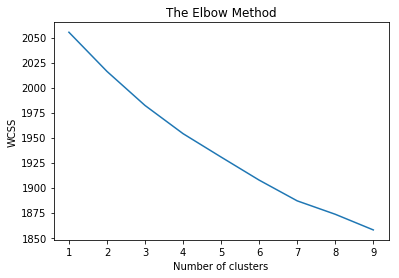

In [48]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#import time
#wcss = []
#start = time.time()
#for i in range(1, 10):
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #kmeans.fit(cluster3_tfidif)
    #wcss.append(kmeans.inertia_)
#end = time.time()
print("execution time:",round(((end-start)/60),2),"minutes")
#plt.plot(range(1, 10), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [23]:
# trying to find subclusters for any cluster 
Subcluster3_df=merged_df[merged_df['Clusters']==3]
# to get only the indices for this cluster
len(Subcluster3_df.index.values)
cluster3_tfidif=tfidf_matrix[Subcluster3_df.index.values]
n_subclusters=4
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(cluster3_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster3_df = Subcluster3_df.assign(Subclusters_level_1 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 3 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,10): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster3_df[Subcluster3_df['Subclusters_level_1']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster3_df.Subclusters_level_1.value_counts())

Breaking cluster 3 from before into sub clusters:

Sub Cluster 0 words: insur, life, properti, casualti, properti casualti, life insur, health, commerci, automobil, benefit,

Sub Cluster 0 Companies: MetLife, Inc., The Travelers Companies, Inc., Marsh & McLennan Companies, Inc., American Financial Group Inc., Safety Insurance Group Inc., HCI Group, Inc., Aflac Incorporated, Mercury General Corporation, Baldwin & Lyons Inc., United Insurance Holdings Corp.,

Sub Cluster 1 words: softwar, data, network, technolog, digit, applic, cloud, platform, custom, mobil,

Sub Cluster 1 Companies: New Relic, Inc., PFSweb Inc., RealNetworks Inc., Vocera Communications, Inc., Globalstar Inc., Datawatch Corporation, Bazaarvoice, Inc., Instructure, Inc., Emmis Communications Corp., Mitek Systems, Inc.,

Sub Cluster 2 words: manufactur, equip, industri, power, compon, engin, applic, control, electron, use,

Sub Cluster 2 Companies: CVD Equipment Corporation, Worthington Industries, Inc., SAExploration Ho

### Splitting cluster 4


execution time: 0.16 minutes


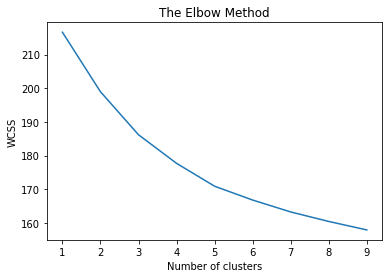

In [49]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import time
wcss = []
start = time.time()
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster4_tfidif)
    wcss.append(kmeans.inertia_)
end = time.time()
print("execution time:",round(((end-start)/60),2),"minutes")
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# trying to find subclusters for any cluster 
Subcluster4_df=merged_df[merged_df['Clusters']==4]
# to get only the indices for this cluster
len(Subcluster4_df.index.values)
cluster4_tfidif=tfidf_matrix[Subcluster4_df.index.values]
n_subclusters=2
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(cluster4_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster4_df = Subcluster4_df.assign(Subclusters_level_1 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 4 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,10): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster4_df[Subcluster4_df['Subclusters_level_1']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster4_df.Subclusters_level_1.value_counts())

Breaking cluster 4 from before into sub clusters:

Sub Cluster 0 words: ga, natur ga, natur, electr, energi, pipelin, mile, oil, crude, crude oil,

Sub Cluster 0 Companies: Energy Transfer Partners, L.P., CVR Energy, Inc., Westar Energy, Inc., Broadwind Energy, Inc., ALLETE, Inc., Northwest Natural Gas Company, ONEOK Inc., Targa Resources Corp., Tallgrass Energy Partners, LP, Phillips 66,

Sub Cluster 1 words: oil, ga, natur ga, natur, oil natur ga, oil natur, explor, oil ga, basin, energi,

Sub Cluster 1 Companies: PEDEVCO Corp., Barnwell Industries, Inc., FMC Technologies, Inc., Exxon Mobil Corporation, Laredo Petroleum, Inc., Yuma Energy, Inc., Eclipse Resources Corporation, Waste Management, Inc., Oasis Petroleum Inc., PrimeEnergy Corp.,



Split of classes within subcluster:
1    158
0    140
Name: Subclusters_level_1, dtype: int64


### Splitting cluster 1


In [25]:
# trying to find subclusters for any cluster 
Subcluster1_df=merged_df[merged_df['Clusters']==1]
# to get only the indices for this cluster
len(Subcluster1_df.index.values)
cluster1_tfidif=tfidf_matrix[Subcluster1_df.index.values]
n_subclusters=2
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(cluster1_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster1_df = Subcluster1_df.assign(Subclusters_level_1 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 1 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,6): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster1_df[Subcluster1_df['Subclusters_level_1']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster1_df.Subclusters_level_1.value_counts())

Breaking cluster 1 from before into sub clusters:

Sub Cluster 0 words: invest, properti, real estat, estat, real, trust,

Sub Cluster 0 Companies: The St. Joe Company, AG Mortgage Investment Trust, Inc., Investors Title Co., Two Harbors Investment Corp., Retail Opportunity Investments Corp., Sabra Health Care REIT, Inc., Kennedy-Wilson Holdings, Inc., Dynex Capital Inc., HCP, Inc., Regency Centers Corporation,

Sub Cluster 1 words: invest, fund, equiti, incom, firm, stock,

Sub Cluster 1 Companies: Horizon Technology Finance Corporation, Clough Global Allocation Fund, Ares Management, L.P., The Bank of New York Mellon Corporation, Tekla Life Sciences Investors, DNP Select Income Fund Inc., Morgan Stanley, Westwood Holdings Group Inc., Main Street Capital Corporation, Adams Natural Resources Fund, Inc.,



Split of classes within subcluster:
0    206
1    143
Name: Subclusters_level_1, dtype: int64


In [26]:
test=pd.concat([Subcluster1_df,Subcluster4_df,Subcluster3_df])
test.drop(['Country','Company','Sector','Industry','Clusters'], axis=1, inplace=True)
merged_df = pd.merge(left=merged_df, right=test, how='left', on="Ticker")

# Creating one more level of sub clusters

### Splitting cluster 3, subcluster 3 into more clusters

In [27]:
# trying to find subclusters for any cluster 

#merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==3]

Subcluster3_level1_3_df=merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==3]
# to get only the indices for this cluster
len(Subcluster3_level1_3_df.index.values)
Subcluster3_level1_3_tfidif=tfidf_matrix[Subcluster3_level1_3_df.index.values]
n_subclusters=4
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(Subcluster3_level1_3_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster3_level1_3_df = Subcluster3_level1_3_df.assign(Subclusters_level_2 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 3 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,10): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster3_level1_3_df[Subcluster3_level1_3_df['Subclusters_level_2']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster3_level1_3_df.Subclusters_level_2.value_counts())

Breaking cluster 3 from before into sub clusters:

Sub Cluster 0 words: care, medic, health, diagnost, surgic, test, patient, healthcar, hospit, devic,

Sub Cluster 0 Companies: PetMed Express, Inc., The Procter & Gamble Company, Sensus Healthcare, Inc., Henry Schein, Inc., SeaSpine Holdings Corporation, Providence Service Corp., Abbott Laboratories, RCM Technologies Inc., Semler Scientific Inc, Intuitive Surgical, Inc.,

Sub Cluster 1 words: brand, retail, food, accessori, apparel, oper, com, home, merchandis, offer,

Sub Cluster 1 Companies: Acme United Corp., Lowe's Companies, Inc., New York & Company Inc., Freshpet, Inc., Burlington Stores, Inc., Owens-Illinois, Inc., AMCON Distributing Co., Revlon, Inc., Under Armour, Inc., US Foods Holding Corp.,

Sub Cluster 2 words: oper, unit, home, new, transport, compani oper, hotel, water, offer, entertain,

Sub Cluster 2 Companies: Consumer Portfolio Services, Inc., NovoCure Limited, EZCORP, Inc., MGM Resorts International, Group 1 Automot

### Splitting cluster 3, subcluster 2 into more clusters

In [28]:
# trying to find subclusters for any cluster 

#merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==3]

Subcluster3_level1_2_df=merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==2]
# to get only the indices for this cluster
len(Subcluster3_level1_2_df.index.values)
Subcluster3_level1_2_tfidif=tfidf_matrix[Subcluster3_level1_2_df.index.values]
n_subclusters=3
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(Subcluster3_level1_2_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster3_level1_2_df = Subcluster3_level1_2_df.assign(Subclusters_level_2 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 3 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,10): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster3_level1_2_df[Subcluster3_level1_2_df['Subclusters_level_2']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster3_level1_2_df.Subclusters_level_2.value_counts())

Breaking cluster 3 from before into sub clusters:

Sub Cluster 0 words: equip, power, engin, industri, manufactur, control, vehicl, electr, compon, energi,

Sub Cluster 0 Companies: Middleby Corp., Servotronics Inc., Flowserve Corp., Fastenal Company, Spirit AeroSystems Holdings, Inc., Donaldson Company, Inc., Hubbell Inc., CIRCOR International, Inc., Deere & Company, Parker-Hannifin Corporation,

Sub Cluster 1 words: steel, manufactur, chemic, metal, materi, coat, specialti, industri, paper, use,

Sub Cluster 1 Companies: Insteel Industries Inc., Berry Plastics Group, Inc., A. Schulman, Inc., Packaging Corporation of America, Air Products and Chemicals, Inc., Koppers Holdings Inc., Ryerson Holding Corporation, Ampco-Pittsburgh Corp., Trinseo SA, Olin Corp.,

Sub Cluster 2 words: manufactur, electron, equip, devic, test, semiconductor, compon, applic, power, optic,

Sub Cluster 2 Companies: Key Technology, Inc., AtriCure, Inc., Alpha & Omega Semiconductor, Ltd., AVX Corp., Richardson E

### Splitting cluster 3, subcluster 1 into more clusters

In [29]:
# trying to find subclusters for any cluster 

#merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==3]

Subcluster3_level1_1_df=merged_df[merged_df['Clusters']==3][merged_df[merged_df['Clusters']==3]['Subclusters_level_1']==1]
# to get only the indices for this cluster
len(Subcluster3_level1_1_df.index.values)
Subcluster3_level1_1_tfidif=tfidf_matrix[Subcluster3_level1_1_df.index.values]
n_subclusters=3
km1 = KMeans(n_clusters=n_subclusters, random_state = 42)
km1.fit(Subcluster3_level1_1_tfidif)
clusters1 = km1.labels_.tolist()
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster3_level1_1_df = Subcluster3_level1_1_df.assign(Subclusters_level_2 = clusters1)
# printing the terms and companies for the sub-cluster
from __future__ import print_function
print("Breaking cluster 3 from before into sub clusters:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km1.cluster_centers_.argsort()[:, ::-1] 
for i in range(n_subclusters):
    print("Sub Cluster %d words:" % int(i), end='')
    
    for ind in range(0,10): # top 6 words per cluster
        print(' %s' % terms[order_centroids[i,ind]], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Sub Cluster %d Companies:" % int(i), end='')
    #print()
    for title in Subcluster3_level1_1_df[Subcluster3_level1_1_df['Subclusters_level_2']==i]["Company"].sample(10).values.tolist():
        print(' %s,' % title, end='')
        #uncomment below to see the Sector and Industry of each Company
        #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
    print() #add whitespace
    print() #add whitespace
    
print()
print()
print("Split of classes within subcluster:")
print(Subcluster3_level1_1_df.Subclusters_level_2.value_counts())

Breaking cluster 3 from before into sub clusters:

Sub Cluster 0 words: digit, content, advertis, media, televis, video, platform, entertain, onlin, network,

Sub Cluster 0 Companies: Dolby Laboratories, Inc., Brightcove Inc., Barnes & Noble Education, Inc., j2 Global, Inc., Monotype Imaging Holdings Inc., the Rubicon Project, Inc., eBay Inc., Inuvo, Inc., Digital Ally Inc., Eastman Kodak Co.,

Sub Cluster 1 words: network, commun, wireless, voic, video, data, access, mobil, connect, softwar,

Sub Cluster 1 Companies: Harmonic Inc., Digi International Inc., Sigma Designs, Inc., CalAmp Corp., Pandora Media, Inc., Vonage Holdings Corporation, Calix Inc., Ciena Corporation, Infinera Corporation, Control4 Corporation,

Sub Cluster 2 words: softwar, data, technolog, cloud, applic, custom, offer, secur, support, platform,

Sub Cluster 2 Companies: TSR, Inc., Robert Half International Inc., FedEx Corporation, The Brink's Company, Daily Journal Corp., FactSet Research Systems Inc., Cornerstone

In [36]:
test=pd.concat([Subcluster3_level1_1_df,Subcluster3_level1_2_df,Subcluster3_level1_3_df])
test.drop(['Country','Company','Sector','Industry','Clusters','Subclusters_level_1'], axis=1, inplace=True)
merged_df = pd.merge(left=merged_df, right=test, how='left', on="Ticker")

 #check if new_merged_df is correct, if so then rename it to merged_df
merged_df.columns = ['Ticker', 'Company', 'Sector', 'Industry', 'Country', 'Clusters Level 0','Clusters Level 1', \
                         'Clusters Level 2']
#temp = merged_df[merged_df['Clusters Level 0']==3]
#temp = temp[temp['Clusters Level 1']==3]
#temp = temp[temp['Clusters Level 2']==3].info()



In [65]:
# See the dataframe with the 3 levels, level 0, level 1 and level 2
merged_df

,Ticker,Company,Sector,Industry,Country,Clusters Level 0,Clusters Level 1,Clusters Level 2
0,A,"Agilent Technologies, Inc.",Healthcare,Medical Laboratories & Research,USA,3,2.0,2.0
1,AA,Alcoa Inc.,Basic Materials,Aluminum,USA,3,3.0,2.0
2,AAC,"AAC Holdings, Inc.",Healthcare,Specialized Health Services,USA,3,3.0,0.0
3,AAL,American Airlines Group Inc.,Services,Major Airlines,USA,3,3.0,2.0
4,AAMC,Altisource Asset Management Corporation,Financial,Asset Management,USA,3,3.0,2.0
5,AAME,Atlantic American Corp.,Financial,Life Insurance,USA,3,0.0,NaN
6,AAN,"Aaron's, Inc.",Services,Rental & Leasing Services,USA,3,3.0,2.0
7,AAOI,"Applied Optoelectronics, Inc.",Technology,Semiconductor - Integrated Circuits,USA,3,2.0,2.0
8,AAON,AAON Inc.,Industrial Goods,General Building Materials,USA,3,2.0,0.0
9,AAP,Advance Auto Parts Inc.,Services,Auto Parts Stores,USA,3,2.0,0.0


In [139]:
# rough work
# to find the 1st common term for cluster 0
#terms[order_centroids[0,0]]
#merged_df[merged_df['Clusters']==i]["Company"][0:5].values.tolist()
#order_centroids shape is 4x360 ie., 360 features from tdidf and 4 clusters from KNN
#terms[order_centroids[0,14]]
#import random    
#my_randoms=[]    
#for i in range (10):    
    #my_randoms.append(random.randrange(1,3559,1))    
    #print (my_randoms)  
#my_randoms
#title1 = merged_df[merged_df['Clusters']==0]["Company"].sample(1).values.tolist()
#merged_df.Sector[merged_df.Company=="Independent Bank Corporation"].values[0]
# Take separate dataframe according to each cluster
#Cluster0=merged_df[merged_df.Clusters==0]
#Cluster1=merged_df[merged_df.Clusters==1]
#Cluster2=merged_df[merged_df.Clusters==2]
#Cluster3=merged_df[merged_df.Clusters==3]
#print("Cluster0:",Cluster0.Sector.mode()[0],":- % correct categories is ",round(len(Cluster0[Cluster0.Sector==Cluster0.Sector.mode()[0]])/len(Cluster0)*100,2))
#print("Cluster1:",Cluster1.Sector.mode()[0],":- % correct categories is ",round(len(Cluster1[Cluster1.Sector==Cluster1.Sector.mode()[0]])/len(Cluster1)*100,2))
#print("Cluster2:",Cluster2.Sector.mode()[0],":- % correct categories is ",round(len(Cluster2[Cluster2.Sector==Cluster2.Sector.mode()[0]])/len(Cluster2)*100,2))
#print("Cluster3:",Cluster3.Sector.mode()[0],":- % correct categories is ",round(len(Cluster3[Cluster3.Sector==Cluster3.Sector.mode()[0]])/len(Cluster3)*100,2))
#print() #add whitespace
#print() #add whitespace